In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [46]:
!which python

/Users/diegopiccinotti/opt/anaconda3/bin/python


In [53]:
budget = 1000
sample_size = 20
env = "RaceStrategy"
particles = [2,4,6,8,10,12,14,16,18,20]

df = pd.read_csv("{}/pf_{}/data_eval_pf_{}_{}.csv".format(env,budget,env,budget))
df['type'] = ["pf"]*df.shape[0]

temp = pd.DataFrame(columns=df.columns)

for p in particles:
    res = df.loc[df['agent'] == str(p)+'_pf', ][:sample_size]
    temp = pd.concat([temp, res])

df = temp
df

,agent,total_reward,discounted_reward,length,budget,pit_count,type
0,2_pf,7.034789,7.034789,20,1000,4,pf
1,2_pf,6.778635,6.778635,20,1000,4,pf
2,2_pf,6.392412,6.392412,20,1000,2,pf
3,2_pf,6.507043,6.507043,20,1000,6,pf
4,2_pf,6.936075,6.936075,20,1000,6,pf
...,...,...,...,...,...,...,...
195,20_pf,6.996974,6.996974,20,1000,5,pf
196,20_pf,6.739293,6.739293,20,1000,10,pf
197,20_pf,6.882370,6.882370,20,1000,7,pf
198,20_pf,7.158619,7.158619,20,1000,5,pf


In [54]:
df_dpw = pd.read_csv("{}/dpw_{}/dpw_mcts_only_{}_{}_data_exp_0.csv".format(env,budget,env,budget))
df_dpw['type'] = ["dpw"]*df_dpw.shape[0]
df_dpw['agent'] = ["dpw"]*df_dpw.shape[0]
df_dpw = df_dpw[:sample_size]
df_dpw

,agent,total_reward,discounted_reward,length,budget,pit_count,type
0,dpw,6.940033,6.312137,20,1000,4,dpw
1,dpw,6.752647,6.163173,20,1000,3,dpw
2,dpw,7.061871,6.425430,20,1000,4,dpw
3,dpw,6.852712,6.204206,20,1000,4,dpw
4,dpw,6.628111,6.035856,20,1000,3,dpw
5,dpw,7.196865,6.548710,20,1000,4,dpw
6,dpw,6.678452,6.088872,20,1000,2,dpw
7,dpw,6.757813,6.176535,20,1000,3,dpw
8,dpw,6.414739,5.852428,20,1000,4,dpw
9,dpw,7.174899,6.528102,20,1000,2,dpw


In [55]:
df2 = pd.read_csv("{}/paper_{}/data.csv".format(env,budget))
df2 = df2[~df2.agent.isin(['agent'])].apply(pd.to_numeric, errors='ignore')
df2 = df2.sort_values(by="agent")
df2['type'] = ["paper"]*df2.shape[0]
df2

,agent,budget,seed,total_reward,return,length,pit_count,type
79,deterministic,1000,871318062,6.572015,5.956774,20,3,paper
30,deterministic,1000,871318045,6.871562,6.225423,20,4,paper
29,deterministic,1000,871318046,6.967961,6.376752,20,3,paper
27,deterministic,1000,871318048,6.970142,6.318483,20,3,paper
26,deterministic,1000,871318047,7.258521,6.607941,20,2,paper
...,...,...,...,...,...,...,...,...
43,random,1000,871318058,6.313278,5.761122,20,8,paper
28,random,1000,871318054,7.149997,6.519255,20,3,paper
37,random,1000,871318057,6.735336,6.115460,20,8,paper
10,random,1000,871318050,6.685643,6.093638,20,9,paper


In [56]:
temp = pd.DataFrame(columns=df2.columns)

for agent in df2["agent"].unique():
    res = df2.loc[df2['agent'] == agent, ][:sample_size]
    temp = pd.concat([temp, res])
    
df2 = temp

df3 = pd.concat([df, df2, df_dpw], ignore_index=True)
df3 = df3.sort_values(by="agent")

df3

/Users/diegopiccinotti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,agent,budget,discounted_reward,length,pit_count,return,seed,total_reward,type
89,10_pf,1000,6.148431,20,6,NaN,NaN,6.148431,pf
97,10_pf,1000,6.981407,20,5,NaN,NaN,6.981407,pf
96,10_pf,1000,6.675129,20,4,NaN,NaN,6.675129,pf
95,10_pf,1000,6.782434,20,8,NaN,NaN,6.782434,pf
94,10_pf,1000,6.115489,20,7,NaN,NaN,6.115489,pf
...,...,...,...,...,...,...,...,...,...
276,random,1000,NaN,20,3,6.519255,871318054,7.149997,paper
277,random,1000,NaN,20,8,6.115460,871318057,6.735336,paper
278,random,1000,NaN,20,9,6.093638,871318050,6.685643,paper
271,random,1000,NaN,20,6,6.315112,871318053,6.939458,paper


Saving total_reward plot to RaceStrategy/racestrategy_total_reward_1000.png


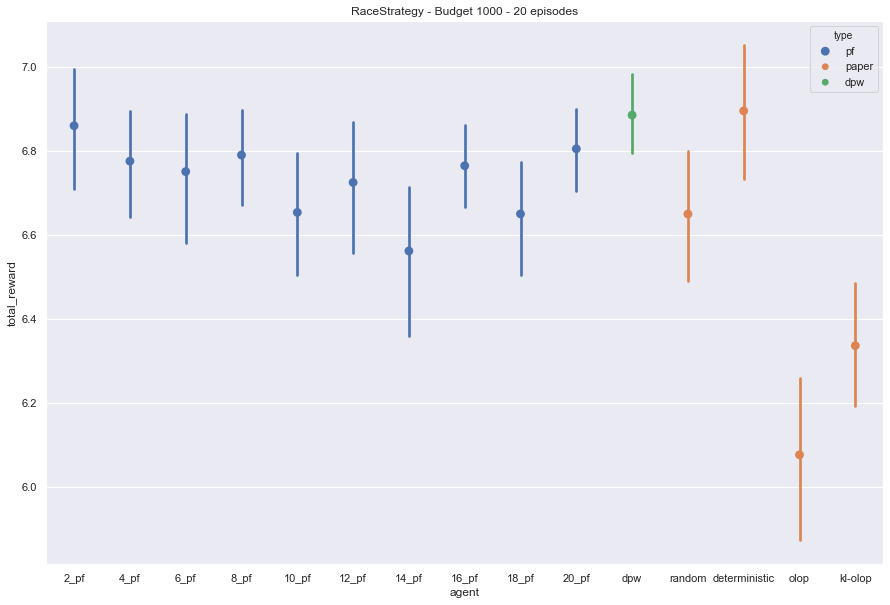

In [57]:
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
plot = sns.pointplot(x="agent", y="total_reward", data=df3, hue="type", legend=False, join=False,
                    order=["2_pf", "4_pf", "6_pf", "8_pf", "10_pf", "12_pf", "14_pf","16_pf","18_pf","20_pf", "dpw", "random", "deterministic", "olop", "kl-olop"])

plot.set_title("{} - Budget {} - {} episodes".format(env, budget, sample_size))


field_path = "{}/{}_total_reward_{}.png".format(env, env.lower(), budget)
plot.get_figure().savefig(field_path, bbox_inches='tight')
print("Saving total_reward plot to {}".format(field_path))

Saving pit_count plot to RaceStrategy/racestrategy_pit_count_1000.png


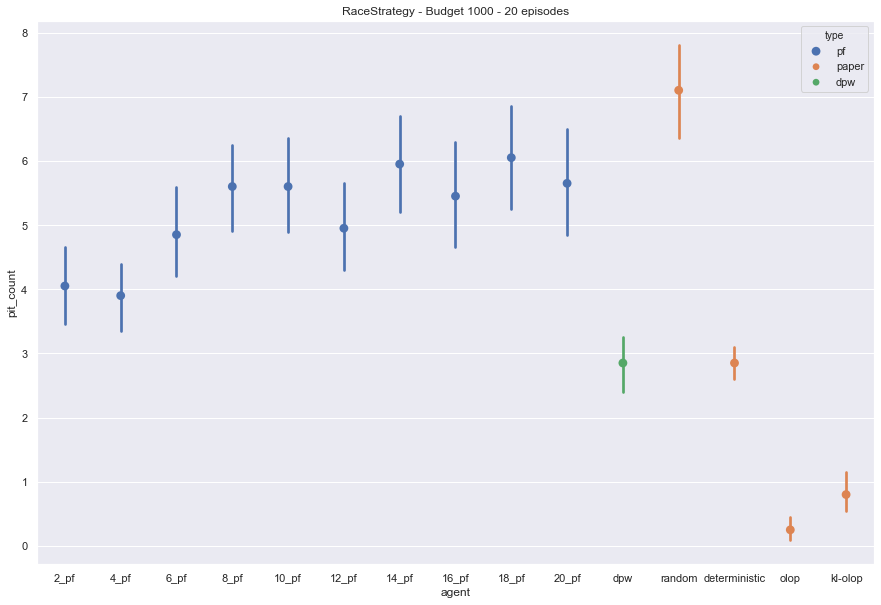

In [58]:
if env == "RaceStrategy":
    plt.figure(figsize=(15, 10))


    plot = sns.pointplot(x="agent", y="pit_count", data=df3, hue="type", legend=False, join=False,
                            order=["2_pf", "4_pf", "6_pf", "8_pf", "10_pf", "12_pf", "14_pf","16_pf","18_pf","20_pf", "dpw", "random", "deterministic", "olop", "kl-olop"])
    #plot2 = sns.pointplot(x="agent", y="total_reward", hue="type", data=df, legend=False)

    plot.set_title("{} - Budget {} - {} episodes".format(env, budget, sample_size))


    field_path = "{}/{}_pit_count_{}.png".format(env, env.lower(), budget)
    plot.get_figure().savefig(field_path, bbox_inches='tight')
    # plt.show()
    print("Saving pit_count plot to {}".format(field_path))